# Struktury drzewiaste

##### Funkcja do ładnego formatowania KOMPLETNYCH drzew binarnych

Do funkcji musi być przekazana indeksowalna sekwencja, która reprezentuje kolejne wartości z kolejnych poziomów drzewa (w kolejności od lewej do prawej na każdym z poziomów).

In [1]:
def complete_tree_string(values):
    if values:
        just = 0
        data = []

        limit = 1
        values_row = []
        branches_row = []
        prev_nodes = 0

        for i in range(1, len(values) + 1):
            curr_nodes = i - prev_nodes
            val_str = str(values[i-1])
            just = max(just, len(val_str))
            values_row.append(val_str)
            right_child_idx = 2 * i
            left_child_idx = right_child_idx - 1
            if left_child_idx < len(values):
                branches_row.append('/')
            if right_child_idx < len(values):
                branches_row.append('\\')

            if curr_nodes == limit: 
                prev_nodes = i
                limit *= 2
                data.append([values_row, branches_row])
                values_row = []
                branches_row = []

        if values_row:
            data.append([values_row, branches_row])

        begin_sep = sep = 3 if just % 2 else 2
        data_iter = iter(data[::-1])
        result = [''] * (len(data) * 2 - 1)
        result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

        # Format the tree string
        for i, (values, branches) in enumerate(data_iter):
            mul = 2 * i + 1
            # Values
            indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
            sep = 2 * sep + just
            result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
            # Branches
            branch_indent = (3 * indent + just) // 4
            branches_row = []
            d_indent = indent - branch_indent
            branches_sep = ' ' * (2 * (d_indent - 1) + just)
            for i in range(0, len(branches), 2):
                branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1] if i + 1 < len(branches) else ''}")
            result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

        return '\n'.join(result)
    else:
        return ''

##### Funkcja do ładnego formatowania każdych drzew binarnych, których wierzchołki są zaimplementowane jako węzły, posiadające wskażnik na roota lewego poddrzewa oraz roota prawego poddrzewa

Do funkcji musi być przekazany korzeń (root) drzewa, które ma zostać sformatowane. Obiekt ten (jak i korzeń każdego poddrzewa, z których składa się przekazane drzewo) musi zawierać wskaźniki do lewego oraz prawego poddrzewa (odpowiednio $ self.left $ i $ self.right $).

In [2]:
def binary_tree_string(tree_root):
    if not tree_root: return ''

    # Store data from a tree
    data = []
    lvl_nodes = [tree_root]
    just = 1

    while True:
        if not lvl_nodes: break

        curr_row = []
        branches = []
        next_nodes = []

        if not any(lvl_nodes):
            break

        for node in lvl_nodes:
            if not node:
                curr_row.append('')
                branches.extend([' ', ' '])
                next_nodes.extend([None, None])
            else:
                val = str(node.val)
                just = max(len(val), just)
                curr_row.append(val)

                if node.left:
                    next_nodes.append(node.left)
                    branches.append('/')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

                if node.right:
                    next_nodes.append(node.right)
                    branches.append('\\')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

        data.append((curr_row, branches))
        lvl_nodes = next_nodes

    begin_sep = sep = 3 if just % 2 else 2
    data_iter = iter(data[::-1])
    result = [''] * (len(data) * 2 - 1)
    result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

    # Format the tree string
    for i, (values, branches) in enumerate(data_iter):
        mul = 2 * i + 1
        # Values
        indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
        sep = 2 * sep + just
        result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
        # Branches
        branch_indent = (3 * indent + just) // 4
        branches_row = []
        d_indent = indent - branch_indent
        branches_sep = ' ' * (2 * (d_indent - 1) + just)
        for i in range(0, len(branches), 2):
            branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1]}")
        result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

    return '\n'.join(result)

## Kopiec binarny (Binary Heap)

Grafika z Cormena, przedstawiająca wyobrażenie kopca oraz jego odpowiednią reprezentację, przy pomocy tablicy.
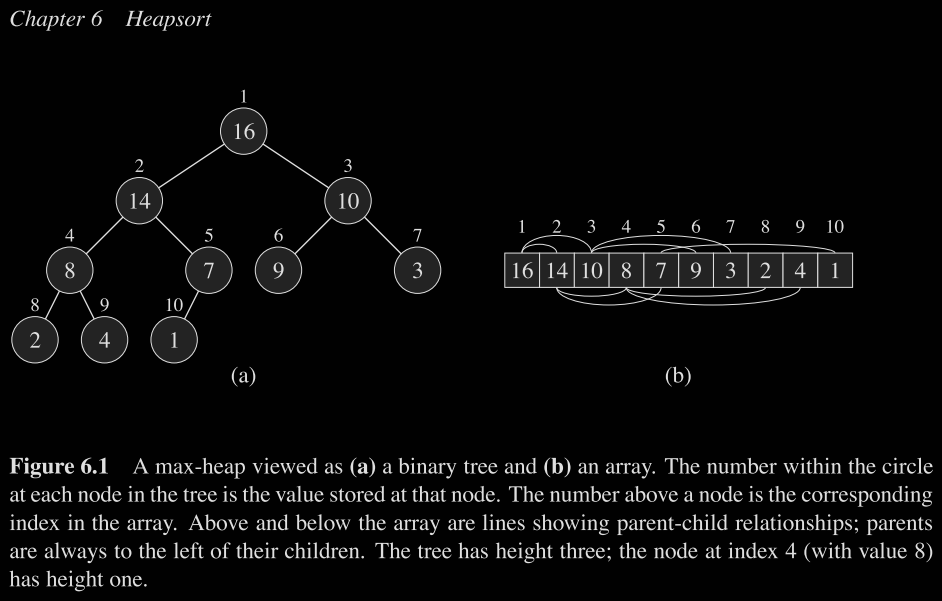
Więcej informacji oraz linki do filmików, na których struktura jest krok po kroku wytłumaczona, zajdują się w pliku o sortowaniach (patrz Heap Sort).

## Max Heap (kopiec binarny, którego korzeniem zawsze jest NAJWIĘKSZA wartość).

### Implementacja struktury #1 (obiektowa)
#### (Z wykorzystaniem dynamicznej tablicy do przechowywania wartości)

In [3]:
class MaxHeap:
    def __init__(self, values=None):
        if values:
            self.heap = list(values) # We make a copy of values in order not to modify them
            self.build_heap()
        else:
            self.heap = []
        
    def __str__(self):  # A 'complete_tree_string' function is required in order to ensure that printing works
        return complete_tree_string(self.heap)
    
    def __bool__(self):
        return bool(self.heap)
    
    @property
    def heap_size(self):
        return len(self.heap)
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, val: object):
        # Add a value as the last node of a Complete Binary Tree
        self.heap.append(val)
        # Fix a heap in order to satisfy a max-heap property
        self._heapify_up(self.heap_size - 1)
        
    def get_max(self) -> object:
        return None if not self.heap else self.heap[0]
        
    def remove_max(self) -> object:
        if self.heap_size == 0:
            raise IndexError(f'remove_max from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last = self.heap.pop()
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a max-heap property
            self._heapify_down(0, self.heap_size)
        return removed
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):  # O(log n)
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.heap[curr_idx] > self.heap[parent_idx]:
                self.swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):  # O(log n)
        # Loop till the current node has a child larger than itself
        # We assume that when we enter a node which both children are
        # smaller than this node, a subtree which a current node is a
        # root of must fulfill a max-heap property
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            largest_idx = curr_idx

            if l < end_idx:
                if self.heap[l] > self.heap[curr_idx]: 
                    largest_idx = l
                if r < end_idx and self.heap[r] > self.heap[largest_idx]:
                    largest_idx = r

            if largest_idx != curr_idx:
                self.swap(curr_idx, largest_idx)
                curr_idx = largest_idx
            else:
                break
        
    def build_heap(self):  # O (n)
        for i in range(self.heap_size // 2 - 1, -1, -1):
            self._heapify_down(i, self.heap_size)

Kilka testów

In [4]:
mh = MaxHeap(range(3))
print(mh, end='\n\n')
mh.insert(2)
print(mh, end='\n\n')
mh.insert(0)
print(mh, end='\n\n')
mh.insert(6)  # See how nodes were swapped after inserting this value
print(mh, end='\n\n')
mh.insert(7)
print(mh, end='\n\n')
print(mh.get_max())
print()
print('=== Removing max value in a loop: ===')
while mh:  # Check if removing works properly
    print('Removed:', mh.remove_max())
    print(mh, end='\n\n')

  2
 / \
1   0

      2
    /   \
  2       0
 / 
1

      2
    /   \
  2       0
 / \
1   0

      6
    /   \
  2       2
 / \     / 
1   0   0

      7
    /   \
  2       6
 / \     / \
1   0   0   2

7

=== Removing max value in a loop: ===
Removed: 7
      6
    /   \
  2       2
 / \     / 
1   0   0

Removed: 6
      2
    /   \
  1       2
 / \
0   0

Removed: 2
      2
    /   \
  1       0
 / 
0

Removed: 2
  1
 / \
0   0

Removed: 1
  0
 / 
0

Removed: 0
0

Removed: 0




### Implementacja struktury #2 (funkcyjna)
#### (Z wykorzystaniem dynamicznej tablicy do przechowywania wartości)

In [5]:
_left = lambda i: 2 * i + 1
_right = lambda i: 2 * i + 2
_parent = lambda i: (i - 1) // 2


# Swap values in an array in order to satisfy a max-heap property
def build_max_heap(values: list):
    for i in range(len(values) // 2 - 1, -1, -1):
        _heapify_down(values, i, len(values))
        
        
def insert_to_max_heap(heap: list, val: object):
    # Add a value as the last node of a Complete Binary Tree
    heap.append(val)
    # Fix a heap in order to satisfy a max-heap property
    _heapify_up(heap, len(heap) - 1)
    

def get_max_in_heap(heap: list) -> object:
    return None if not heap else heap[0]
    
    
def remove_max_from_heap(heap: list) -> object:
    if not heap:
        raise IndexError(f'remove_max from an empty Max Heap')
    # Store a value to be returned
    removed = heap[0]
    # Place the last leaf in the root position
    last = heap.pop()
    if heap:
        heap[0] = last
        # Fix a heap in order to stisfy a max-heap property
        _heapify_down(heap, 0, len(heap))
    return removed


def print_max_heap(heap: list, *args, **kwargs):
    print(complete_tree_string(heap), *args, **kwargs)
    
    
def _swap(heap: list, i, j):
    heap[i], heap[j] = heap[j], heap[i]
    
    
def _heapify_up(heap: list, curr_idx: 'heapify begin index', end_idx: 'heapify end index' = 0):
    while curr_idx > end_idx:
        parent_idx = _parent(curr_idx)
        if heap[curr_idx] > heap[parent_idx]:
            _swap(heap, curr_idx, parent_idx)
        curr_idx = parent_idx
            
    
def _heapify_down(heap: list, curr_idx: 'heapify begin index', end_idx: 'heapify end index'):
    # Loop till the current node has a child larger than itself
    # We assume that when we enter a node which both children are
    # smaller than this node, a subtree which a current node is a
    # root of must fulfill a max-heap property.
    while True:
        i = _left(curr_idx)
        j = _right(curr_idx)
        k = curr_idx
        
        if i < end_idx:
            if heap[i] > heap[k]:
                k = i
            if j < end_idx and heap[j] > heap[k]:
                k = j
                
        if k == curr_idx: return
        # Swap the current with the largest child
        heap[curr_idx], heap[k] = heap[k], heap[curr_idx]
        curr_idx = k

Kilka testów

In [6]:
mh = list(range(3))
build_max_heap(mh)
print_max_heap(mh, end='\n\n')
insert_to_max_heap(mh, 2)
print_max_heap(mh, end='\n\n')
insert_to_max_heap(mh, 0)
print_max_heap(mh, end='\n\n')
insert_to_max_heap(mh, 6)
print_max_heap(mh, end='\n\n')
insert_to_max_heap(mh, 7)
print_max_heap(mh, end='\n\n')
print(get_max_in_heap(mh))
print()
print('=== Removing max value in a loop: ===')
while mh:  # Check if removing works properly
    print('Removed:', remove_max_from_heap(mh))
    print_max_heap(mh, end='\n\n')

  2
 / \
1   0

      2
    /   \
  2       0
 / 
1

      2
    /   \
  2       0
 / \
1   0

      6
    /   \
  2       2
 / \     / 
1   0   0

      7
    /   \
  2       6
 / \     / \
1   0   0   2

7

=== Removing max value in a loop: ===
Removed: 7
      6
    /   \
  2       2
 / \     / 
1   0   0

Removed: 6
      2
    /   \
  1       2
 / \
0   0

Removed: 2
      2
    /   \
  1       0
 / 
0

Removed: 2
  1
 / \
0   0

Removed: 1
  0
 / 
0

Removed: 0
0

Removed: 0




### Implementacja struktury #3 (obiektowa)
#### (Z wykorzystaniem limitowanego miejsca na wartości)

In [7]:
class MaxHeap:
    def __init__(self, maxsize=127):
        if not isinstance(maxsize, int):
            raise TypeError(f"expected 'int', got {str(type(maxsize))[7:-1]}")
        if maxsize <= 0:
            raise ValueError(f"cannot create a {self.__class__.__name__} of a max size {maxsize}")
        self.heap = [None] * maxsize  # Allocate a constant memory space
        self.size = 0
        self._free_idx = 0
        
    def __str__(self):  # A 'complete_tree_string' function is required in order to ensure that printing works
        return complete_tree_string(self.heap[:self._free_idx])
    
    def __bool__(self):
        return bool(self._free_idx)
    
    def __len__(self):
        return len(self.heap)
    
    @property
    def heap_size(self):
        return self._free_idx
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, val: object):
        if self.heap_size == len(self):
            raise OverflowError(f'insert in a completely filled {self.__class__.__name__}')
        # Add a value as the last node of a Complete Binary Tree
        self.heap[self._free_idx] = val
        # Fix a heap in order to satisfy a max-heap property
        self._heapify_up(self.heap_size - 1)
        self._free_idx += 1
        
    def get_max(self) -> object:
        return None if not self.heap else self.heap[0]
        
    def remove_max(self) -> object:
        if self.heap_size == 0:
            raise IndexError(f'remove_max from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last_idx = self._free_idx - 1
        last = self.heap[last_idx]
        self.heap[last_idx] = None
        self._free_idx -= 1
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a max-heap property
            self._heapify_down(0, self.heap_size)
        return removed
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):  # O(log n)
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.heap[curr_idx] > self.heap[parent_idx]:
                self.swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):  # O(log n)
        # Loop till the current node has a child larger than itself
        # We assume that when we enter a node which both children are
        # smaller than this node, a subtree which a current node is a
        # root of must fulfill a max-heap property
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            largest_idx = curr_idx

            if l < end_idx:
                if self.heap[l] > self.heap[curr_idx]: 
                    largest_idx = l
                if r < end_idx and self.heap[r] > self.heap[largest_idx]:
                    largest_idx = r

            if largest_idx != curr_idx:
                self.swap(curr_idx, largest_idx)
                curr_idx = largest_idx
            else:
                break

Kilka testów

In [8]:
mh = MaxHeap(10)  # Set a max number of elements which can be stored at once
for val in range(3):
    mh.insert(val)
print(mh, end='\n\n')
mh.insert(2)
print(mh, end='\n\n')
mh.insert(0)
print(mh, end='\n\n')
mh.insert(6)  # See how nodes were swapped after inserting this value
print(mh, end='\n\n')
mh.insert(7)
print(mh, end='\n\n')
print(mh.get_max())
print()
print('=== Removing max value in a loop: ===')
while mh:  # Check if removing works properly
    print('Removed:', mh.remove_max())
    print('Heap size:', mh.heap_size)
    print(mh, end='\n\n')
print('Heap size:', mh.heap_size)
print('Heap length:', len(mh))  # Returns a max number of element that can be stored at once

  1
 / \
0   2

      2
    /   \
  0       1
 / 
2

      2
    /   \
  2       1
 / \
0   0

      2
    /   \
  2       1
 / \     / 
0   0   6

      6
    /   \
  2       2
 / \     / \
0   0   1   7

6

=== Removing max value in a loop: ===
Removed: 6
Heap size: 6
      7
    /   \
  2       2
 / \     / 
0   0   1

Removed: 7
Heap size: 5
      2
    /   \
  1       2
 / \
0   0

Removed: 2
Heap size: 4
      2
    /   \
  1       0
 / 
0

Removed: 2
Heap size: 3
  1
 / \
0   0

Removed: 1
Heap size: 2
  0
 / 
0

Removed: 0
Heap size: 1
0

Removed: 0
Heap size: 0


Heap size: 0
Heap length: 10


## Min Heap (kopiec binarny, którego korzeniem zawsze jest NAJMNIEJSZA wartość).

Struktura analogiczna do Max Heap, ale tym razem na górze kopca zawsze znajduje się obecnie najmniejsza wartość spośród wszystkich wartości w kopcu. Implementacja różni się jedynie operatorem porównania wartości, zastosowanym w metodach $ \_heapify\_up $ i $ \_heapify\_down $. Poza tym jedynie wysępują różnice w nazwach metod (np. $ remove\_min $ zamiast $ remove\_max $ - logiczne).

### Implementacja struktury #1 (obiektowa)
#### (Z wykorzystaniem dynamicznej tablicy do przechowywania wartości)

In [9]:
class MinHeap:
    def __init__(self, values=None):
        if values:
            self.heap = list(values) # We make a copy of values in order not to modify them
            self.build_heap()
        else:
            self.heap = []
        
    def __str__(self):  # A 'complete_tree_string' function is required in order to ensure that printing works
        return complete_tree_string(self.heap)
    
    def __bool__(self):
        return bool(self.heap)
    
    @property
    def heap_size(self):
        return len(self.heap)
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, val: object):
        # Add a value as the last node of a Complete Binary Tree
        self.heap.append(val)
        # Fix a heap in order to satisfy a min-heap property
        self._heapify_up(self.heap_size - 1)
        
    def get_min(self) -> object:
        return None if not self.heap else self.heap[0]
        
    def remove_min(self) -> object:
        if self.heap_size == 0:
            raise IndexError(f'remove_min from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last = self.heap.pop()
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a min-heap property
            self._heapify_down(0, self.heap_size)
        return removed
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):  # O(log n)
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.heap[curr_idx] < self.heap[parent_idx]:
                self.swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):  # O(log n)
        # Loop till the current node has a child smaller than itself
        # We assume that when we enter a node which both children are
        # larger than this node, a subtree which a current node is a
        # root of must fulfill a min-heap property
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            smallest_idx = curr_idx

            if l < end_idx:
                if self.heap[l] < self.heap[curr_idx]: 
                    smallest_idx = l
                if r < end_idx and self.heap[r] < self.heap[smallest_idx]:
                    smallest_idx = r
        
            if smallest_idx != curr_idx:
                self.swap(curr_idx, smallest_idx)
                curr_idx = smallest_idx
            else:
                break
        
    def build_heap(self):   # O (n)
        for i in range(self.heap_size // 2 - 1, -1, -1):
            self._heapify_down(i, self.heap_size)

Kilka testów

In [10]:
mh = MinHeap(range(3))
print(mh, end='\n\n')
mh.insert(2)
print(mh, end='\n\n')
mh.insert(0)
print(mh, end='\n\n')
mh.insert(6)  # See how nodes were swapped after inserting this value
print(mh, end='\n\n')
mh.insert(7)
print(mh, end='\n\n')
print(mh.get_min())
print()
print('=== Removing min value in a loop: ===')
while mh:  # Check if removing works properly
    print('Removed:', mh.remove_min())
    print(mh, end='\n\n')

  0
 / \
1   2

      0
    /   \
  1       2
 / 
2

      0
    /   \
  0       2
 / \
2   1

      0
    /   \
  0       2
 / \     / 
2   1   6

      0
    /   \
  0       2
 / \     / \
2   1   6   7

0

=== Removing min value in a loop: ===
Removed: 0
      0
    /   \
  1       2
 / \     / 
2   7   6

Removed: 0
      1
    /   \
  2       2
 / \
6   7

Removed: 1
      2
    /   \
  6       2
 / 
7

Removed: 2
  2
 / \
6   7

Removed: 2
  6
 / 
7

Removed: 6
7

Removed: 7




### Implementacja struktury #2 (funkcyjna)
#### (Z wykorzystaniem dynamicznej tablicy do przechowywania wartości)

In [11]:
_left = lambda i: 2 * i + 1
_right = lambda i: 2 * i + 2
_parent = lambda i: (i - 1) // 2


# Swap values in an array in order to satisfy a min-heap property
def build_min_heap(values: list):
    for i in range(len(values) // 2 - 1, -1, -1):
        _heapify_down(values, i, len(values))
        
        
def insert_to_min_heap(heap: list, val: object):
    # Add a value as the last node of a Complete Binary Tree
    heap.append(val)
    # Fix a heap in order to satisfy a min-heap property
    _heapify_up(heap, len(heap) - 1)
    
    
def get_min_in_heap(heap: list) -> object:
    return None if not heap else heap[0]
    
    
def remove_min_from_heap(heap: list) -> object:
    if not heap:
        raise IndexError(f'remove_min from an empty Min Heap')
    # Store a value to be returned
    removed = heap[0]
    # Place the last leaf in the root position
    last = heap.pop()
    if heap:
        heap[0] = last
        # Fix a heap in order to stisfy a min-heap property
        _heapify_down(heap, 0, len(heap))
    return removed


def print_min_heap(heap: list, *args, **kwargs):
    print(complete_tree_string(heap), *args, **kwargs)
    
    
def _swap(heap: list, i, j):
    heap[i], heap[j] = heap[j], heap[i]
    
    
def _heapify_up(heap: list, curr_idx: 'heapify begin index', end_idx: 'heapify end index' = 0):
    while curr_idx > end_idx:
        parent_idx = _parent(curr_idx)
        if heap[curr_idx] < heap[parent_idx]:
            _swap(heap, curr_idx, parent_idx)
        curr_idx = parent_idx
            
    
def _heapify_down(heap: list, curr_idx: 'heapify begin index', end_idx: 'heapify end index'):
    # Loop till the current node has a child smaller than itself
    # We assume that when we enter a node which both children are
    # larger than this node, a subtree which a current node is a
    # root of must fulfill a min-heap property
    while True:
        i = _left(curr_idx)
        j = _right(curr_idx)
        k = curr_idx
        
        if i < end_idx:
            if heap[i] < heap[k]:
                k = i
            if j < end_idx and heap[j] < heap[k]:
                k = j
                
        if k == curr_idx: return
        # Swap the current with the smallest child
        heap[curr_idx], heap[k] = heap[k], heap[curr_idx]
        curr_idx = k

Kilka testów

In [12]:
mh = list(range(3))
build_min_heap(mh)
print_min_heap(mh, end='\n\n')
insert_to_min_heap(mh, 2)
print_min_heap(mh, end='\n\n')
insert_to_min_heap(mh, 0)
print_min_heap(mh, end='\n\n')
insert_to_min_heap(mh, 6)
print_min_heap(mh, end='\n\n')
insert_to_min_heap(mh, 7)
print_min_heap(mh, end='\n\n')
print(get_min_in_heap(mh))
print()
print('=== Removing min value in a loop: ===')
while mh:  # Check if removing works properly
    print('Removed:', remove_min_from_heap(mh))
    print_min_heap(mh, end='\n\n')

  0
 / \
1   2

      0
    /   \
  1       2
 / 
2

      0
    /   \
  0       2
 / \
2   1

      0
    /   \
  0       2
 / \     / 
2   1   6

      0
    /   \
  0       2
 / \     / \
2   1   6   7

0

=== Removing min value in a loop: ===
Removed: 0
      0
    /   \
  1       2
 / \     / 
2   7   6

Removed: 0
      1
    /   \
  2       2
 / \
6   7

Removed: 1
      2
    /   \
  6       2
 / 
7

Removed: 2
  2
 / \
6   7

Removed: 2
  6
 / 
7

Removed: 6
7

Removed: 7




### Implementacja struktury #3 (obiektowa)
#### (Z wykorzystaniem limitowanego miejsca na wartości)

In [13]:
class MinHeap:
    def __init__(self, maxsize=127):
        if not isinstance(maxsize, int):
            raise TypeError(f"expected 'int', got {str(type(maxsize))[7:-1]}")
        if maxsize <= 0:
            raise ValueError(f"cannot create a {self.__class__.__name__} of a max size {maxsize}")
        self.heap = [None] * maxsize  # Allocate a constant memory space
        self.size = 0
        self._free_idx = 0
        
    def __str__(self):  # A 'complete_tree_string' function is required in order to ensure that printing works
        return complete_tree_string(self.heap[:self._free_idx])
    
    def __bool__(self):
        return bool(self._free_idx)
    
    def __len__(self):
        return len(self.heap)
    
    @property
    def heap_size(self):
        return self._free_idx
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, val: object):
        if self.heap_size == len(self):
            raise OverflowError(f'insert in a completely filled {self.__class__.__name__}')
        # Add a value as the last node of a Complete Binary Tree
        self.heap[self._free_idx] = val
        # Fix a heap in order to satisfy a min-heap property
        self._free_idx += 1
        self._heapify_up(self.heap_size - 1)
        
    def get_min(self) -> object:
        return None if not self.heap else self.heap[0]
        
    def remove_min(self) -> object:
        if self.heap_size == 0:
            raise IndexError(f'remove_min from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last_idx = self._free_idx - 1
        last = self.heap[last_idx]
        self.heap[last_idx] = None
        self._free_idx -= 1
        if self.heap_size > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a min-heap property
            self._heapify_down(0, self.heap_size)
        return removed
    
    def swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):  # O(log n)
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            if self.heap[curr_idx] < self.heap[parent_idx]:
                self.swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):  # O(log n)
        # Loop till the current node has a child smaller than itself
        # We assume that when we enter a node which both children are
        # larger than this node, a subtree which a current node is a
        # root of must fulfill a min-heap property
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            smallest_idx = curr_idx

            if l < end_idx:
                if self.heap[l] < self.heap[curr_idx]: 
                    smallest_idx = l
                if r < end_idx and self.heap[r] < self.heap[smallest_idx]:
                    smallest_idx = r

            if smallest_idx != curr_idx:
                self.swap(curr_idx, smallest_idx)
                curr_idx = smallest_idx
            else:
                break

Kilka testów

In [14]:
mh = MinHeap(10)  # Set a max number of elements which can be stored at once
for val in range(3):
    mh.insert(val)
print(mh, end='\n\n')
mh.insert(2)
print(mh, end='\n\n')
mh.insert(0)
print(mh, end='\n\n')
mh.insert(6)  # See how nodes were swapped after inserting this value
print(mh, end='\n\n')
mh.insert(7)
print(mh, end='\n\n')
print()
print('=== Removing min value in a loop: ===')
while mh:  # Check if removing works properly
    print('Removed:', mh.remove_min())
    print('Heap size:', mh.heap_size)
    print(mh, end='\n\n')
print('Heap size:', mh.heap_size)
print('Heap length:', len(mh))  # Returns a max number of element that can be stored at once

  0
 / \
1   2

      0
    /   \
  1       2
 / 
2

      0
    /   \
  0       2
 / \
2   1

      0
    /   \
  0       2
 / \     / 
2   1   6

      0
    /   \
  0       2
 / \     / \
2   1   6   7


=== Removing min value in a loop: ===
Removed: 0
Heap size: 6
      0
    /   \
  1       2
 / \     / 
2   7   6

Removed: 0
Heap size: 5
      1
    /   \
  2       2
 / \
6   7

Removed: 1
Heap size: 4
      2
    /   \
  6       2
 / 
7

Removed: 2
Heap size: 3
  2
 / \
6   7

Removed: 2
Heap size: 2
  6
 / 
7

Removed: 6
Heap size: 1
7

Removed: 7
Heap size: 0


Heap size: 0
Heap length: 10


## Priority Queue (kolejka z priorytetem)
### Do implementacji tej abstrakcyjnej struktury danych wykorzystamy Kopiec Binarny (Binary Heap)

Mimo, że jest to kolejka, do jej implementacji wykorzystuje się właśnie kopce, ponieważ mają one tę właściwość, że dodana do nich wartość (np. w przypadku kopca Max Heap, wysoka wartość klucza) może zostać potraktowana jako priorytet i, w związku z tym, element, którego klucz będzie miał odpowiednio wysoką/niską (w zależności od typu kopca) wartość, może się znaleźć wcześniej (niekoniecznie na początku) lub później w kolejce.

W poniższych implementacjach, podczas wypisywania kolejki, strzałki pokazują kierunek przemieszczania się kolejki (tzn. najpierw z kolejki wychodzi element znajdujący się po lewej stronie, a następnie te elementy, które są po jego prawej stronie).

Ponieważ struktura, jaką jest kopiec binarny, jest niestabilna (nie zachowuje wzajemnej kolejności elementów o tych samych kluczach), w kolejce może zostać zmieniona wzajemna kolejność elementów o tym samym priorytecie (Nie ma znaczenia, który element został dodany pierwszy. Jeżeli 2 lub więcej elementów ma ten sam priorytet, są traktowane równo, nawet jeśli jeden z elementów "czeka na wyjście z kolejki" już o wiele dłużej niż inny, który dopiero "wszedł", ale ma ten sam priorytet - trochę to niesprawiedliwe, ale cóż... 🤣).

Jeżeli zależy nam na "stabilnej" kolejce, w której ten z elementów o danym priorytecie, który był dodany wcześniej, wychodzi z kolejki przed tym, ktory był dodany poźniej, można zaimplementować nieco inną kolejkę z licznikiem elementów o danym priorytecie, lecz nie jest ona zbyt wydajna, albo dla każdego kolejnego elementu wstawiać jako drugi priorytet wartość o 1 większą od poprzedniego. Znów nie jest to dobre rozwiązanie, ponieważ w przypadku bardzo wielu operacji na kolejce, liczby mogą stać się bardzo duże (nie istnieje górny limit), a takie podejście jest bardzo niebezpieczne i niewydajne pamięciowo.

###### LINK: 
(implementacja stabilnej kolejki - konieczne jest wykorzystanie słowników, z których nie możemy korzystać) <br>
https://lemire.me/blog/2017/03/13/stable-priority-queues/

## Max Priority Queue
### (Kolejka, w której elementy o wyższym priorytecie są wcześniej)

### Implementacja struktury #1 (obiektowa)

Ponieważ do implementacji kolejki z priorytetem wykorzystujemy kopiec binarny, poniższy kod przypomina implementację struktury Max Heap.

In [15]:
class MaxPriorityQueue:
    def __init__(self):
        self._heap = []
        
    def __len__(self):
        return len(self._heap)
    
    def __iter__(self):  # This method is highly inefficient (O(n * log n))
        pq_cp = self.__class__()
        pq_cp._heap = self._heap[:]
        while pq_cp:
            yield pq_cp.poll()
            
    def __str__(self):   # This method is highly inefficient (O(n * log n))
        return ' <- '.join(f'{priority}: {val}' for priority, val in self.entries())
    
    # Useful for iteration when a priority must be included
    def entries(self):
        pq_cp = self.__class__()
        pq_cp._heap = self._heap[:]
        while pq_cp:
            entry = pq_cp._heap[0]
            pq_cp.poll()
            yield entry
            
    def insert(self, priority: int, val: object):
        if not isinstance(priority, int):
            raise TypeError(f"priority must be 'int', not {str(type(priority))[7:-1]}")
        # Add a value as the last node of our Complete Binary Tree
        self._heap.append((priority, val))
        # Fix heap in order to satisfy a max-heap property
        self._heapify_up(len(self) - 1)
        
    # Removes the first value in a priority queue (of a greatest priority)
    def poll(self):
        if not self:
            raise IndexError(f'poll from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self._heap[0][1]
        # Place the last leaf in the root position
        last = self._heap.pop()
        if len(self) > 0:
            self._heap[0] = last
            # Fix a heap in order to satisfy a max-heap property
            self._heapify_down(0, len(self))
        return removed
    
    def get_first(self):
        return self._heap[0][1] if self._heap else None
            
    @staticmethod
    def _parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def _left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def _right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def _swap(self, i, j):
        self._heap[i], self._heap[j] = self._heap[j], self._heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):  # O(log n)
        while curr_idx > end_idx:
            parent_idx = self._parent_idx(curr_idx)
            if self._heap[curr_idx][0] > self._heap[parent_idx][0]:
                self._swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):  # O(log n)
        while True:
            l = self._left_child_idx(curr_idx)
            r = self._right_child_idx(curr_idx)
            largest_idx = curr_idx

            if l < end_idx:
                if self._heap[l][0] > self._heap[curr_idx][0]: 
                    largest_idx = l
                if r < end_idx and self._heap[r][0] > self._heap[largest_idx][0]:
                    largest_idx = r

            if largest_idx != curr_idx:
                self._swap(curr_idx, largest_idx)
                curr_idx = largest_idx
            else:
                break

Kilka testów

In [16]:
pq = MaxPriorityQueue()
print(pq, len(pq))
for i in range(5):
    pq.insert(i, 10 - i)
print(pq)
pq.insert(2, 12)
print(pq)
pq.insert(-5, 20)
print(pq)
pq.insert(10, 123)
print(pq)
print(list(pq))
print(pq.get_first())
print(len(pq))
while pq:
    print(pq.poll(), end='\t')
print()

 0
4: 6 <- 3: 7 <- 2: 8 <- 1: 9 <- 0: 10
4: 6 <- 3: 7 <- 2: 8 <- 2: 12 <- 1: 9 <- 0: 10
4: 6 <- 3: 7 <- 2: 8 <- 2: 12 <- 1: 9 <- 0: 10 <- -5: 20
10: 123 <- 4: 6 <- 3: 7 <- 2: 8 <- 2: 12 <- 1: 9 <- 0: 10 <- -5: 20
[123, 6, 7, 8, 12, 9, 10, 20]
123
8
123	6	7	8	12	9	10	20	


### Implementacja struktury #2 (funkcyjna)

In [17]:
_left = lambda i: 2 * i + 1
_right = lambda i: 2 * i + 2
_parent = lambda i: (i - 1) // 2
        
        
def insert_to_max_priority_queue(queue: list, priority: int, val: object):
    if not isinstance(priority, int):
        raise TypeError(f"priority must be 'int', not {str(type(priority))[7:-1]}")
    # Add a value as the last node of our Complete Binary Tree
    queue.append((priority, val))
    # Fix heap in order to satisfy a max-heap property
    _heapify_up(queue, len(queue) - 1)
    
    
def poll_from_max_priority_queue(queue: list) -> object:
    if not queue:
        raise IndexError(f'poll from an empty Priority Queue')
    # Store a value to be returned
    removed = queue[0][1]
    # Place the last leaf in the root position
    last = queue.pop()
    if queue:
        queue[0] = last
        # Fix a heap in order to stisfy a max-heap property
        _heapify_down(queue, 0, len(queue))
    return removed


def first_of_max_priority_queue(queue: list) -> object:
    return None if not queue else queue[0]


# This method is highly inefficient (O(n * log n))
def get_entries_of_max_priority_queue(queue: list) -> list:
    pq_cp = queue[:]
    while pq_cp:
        priority = pq_cp[0][0]
        yield priority, poll_from_max_priority_queue(pq_cp)
            

# This method is highly inefficient (O(n * log n))
def print_max_priority_queue(queue: list, *args, **kwargs):
    print(' <- '.join(f'{priority}: {val}' for priority, val in get_entries_of_max_priority_queue(queue)),
          *args, **kwargs)
    
    
# Returns sorted list of elements by their priority
def max_priority_queue_to_list(queue: list) -> list:
    res = []
    pq_cp = queue[:]
    while pq_cp:
        res.append(poll_from_max_priority_queue(pq_cp))
    return res
    
    
def _swap(queue: list, i, j):
    queue[i], queue[j] = queue[j], queue[i]
    
    
def _heapify_up(queue: list, curr_idx: 'heapify begin index', end_idx: 'heapify end index' = 0):
    while curr_idx > end_idx:
        parent_idx = _parent(curr_idx)
        if queue[curr_idx][0] > queue[parent_idx][0]:
            _swap(queue, curr_idx, parent_idx)
        curr_idx = parent_idx
            
    
def _heapify_down(queue: list, curr_idx: 'heapify begin index', end_idx: 'heapify end index'):
    while True:
        i = _left(curr_idx)
        j = _right(curr_idx)
        k = curr_idx
        
        if i < end_idx:
            if queue[i][0] > queue[k][0]:
                k = i
            if j < end_idx and queue[j][0] > queue[k][0]:
                k = j
                
        if k == curr_idx: return
        # Swap the current with the largest child
        queue[curr_idx], queue[k] = queue[k], queue[curr_idx]
        curr_idx = k

Kilka testów

In [18]:
pq = []
for i in range(5):
    insert_to_max_priority_queue(pq, i, 10 - i)
print_max_priority_queue(pq)
insert_to_max_priority_queue(pq, 2, 12)
print_max_priority_queue(pq)
insert_to_max_priority_queue(pq, -5, 20)
print_max_priority_queue(pq)
insert_to_max_priority_queue(pq, 10, 123)
print_max_priority_queue(pq)
print(max_priority_queue_to_list(pq))
print(first_of_max_priority_queue(pq))
print(len(pq))
while pq:
    print(poll_from_max_priority_queue(pq), end='\t')
print()

4: 6 <- 3: 7 <- 2: 8 <- 1: 9 <- 0: 10
4: 6 <- 3: 7 <- 2: 8 <- 2: 12 <- 1: 9 <- 0: 10
4: 6 <- 3: 7 <- 2: 8 <- 2: 12 <- 1: 9 <- 0: 10 <- -5: 20
10: 123 <- 4: 6 <- 3: 7 <- 2: 8 <- 2: 12 <- 1: 9 <- 0: 10 <- -5: 20
[123, 6, 7, 8, 12, 9, 10, 20]
(10, 123)
8
123	6	7	8	12	9	10	20	


## Min Priority Queue
### (Kolejka, w której elementy o niższym priorytecie są wcześniej)

### Implementacja struktury #1 (obiektowa)

Ponieważ do implementacji kolejki z priorytetem wykorzystujemy kopiec binarny, poniższy kod przypomina implementację struktury Min Heap.

In [19]:
class MinPriorityQueue:
    def __init__(self):
        self._heap = []
        
    def __len__(self):
        return len(self._heap)
    
    def __iter__(self):  # This method is highly inefficient (O(n * log n))
        pq_cp = self.__class__()
        pq_cp._heap = self._heap[:]
        while pq_cp:
            yield pq_cp.poll()
            
    def __str__(self):   # This method is highly inefficient (O(n * log n))
        return ' <- '.join(f'{priority}: {val}' for priority, val in self.entries())
    
    # Useful for iteration when a priority must be included
    def entries(self):
        pq_cp = self.__class__()
        pq_cp._heap = self._heap[:]
        while pq_cp:
            entry = pq_cp._heap[0]
            pq_cp.poll()
            yield entry
        
            
    def insert(self, priority: int, val: object):
        if not isinstance(priority, int):
            raise TypeError(f"priority must be 'int', not {str(type(priority))[7:-1]}")
        # Add a value as the last node of our Complete Binary Tree
        self._heap.append((priority, val))
        # Fix heap in order to satisfy a min-heap property
        self._heapify_up(len(self) - 1)
        
    # Removes the first value in a priority queue (of the lowest priority)
    def poll(self):
        if not self:
            raise IndexError(f'poll from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self._heap[0][1]
        # Place the last leaf in the root position
        last = self._heap.pop()
        if len(self) > 0:
            self._heap[0] = last
            # Fix a heap in order to stisfy a min-heap property
            self._heapify_down(0, len(self))
        return removed
    
    def get_first(self):
        return self._heap[0][1] if self._heap else None
            
    @staticmethod
    def _parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def _left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def _right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def _swap(self, i, j):
        self._heap[i], self._heap[j] = self._heap[j], self._heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):  # O(log n)
        while curr_idx > end_idx:
            parent_idx = self._parent_idx(curr_idx)
            if self._heap[curr_idx][0] < self._heap[parent_idx][0]:
                self._swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):  # O(log n)
        while True:
            l = self._left_child_idx(curr_idx)
            r = self._right_child_idx(curr_idx)
            smallest_idx = curr_idx

            if l < end_idx:
                if self._heap[l][0] < self._heap[curr_idx][0]: 
                    smallest_idx = l
                if r < end_idx and self._heap[r][0] < self._heap[smallest_idx][0]:
                    smallest_idx = r

            if smallest_idx != curr_idx:
                self._swap(curr_idx, smallest_idx)
                curr_idx = smallest_idx
            else:
                break

KIlka testów

In [20]:
pq = MinPriorityQueue()
print(pq, len(pq))
for i in range(5):
    pq.insert(i, 10 - i)
print(pq)
pq.insert(2, 12)
print(pq)
pq.insert(-5, 20)
print(pq)
pq.insert(10, 123)
print(pq)
print(list(pq))
print(pq.get_first())
print(len(pq))
while pq:
    print(pq.poll(), end='\t')
print()

 0
0: 10 <- 1: 9 <- 2: 8 <- 3: 7 <- 4: 6
0: 10 <- 1: 9 <- 2: 12 <- 2: 8 <- 3: 7 <- 4: 6
-5: 20 <- 0: 10 <- 1: 9 <- 2: 12 <- 2: 8 <- 3: 7 <- 4: 6
-5: 20 <- 0: 10 <- 1: 9 <- 2: 8 <- 2: 12 <- 3: 7 <- 4: 6 <- 10: 123
[20, 10, 9, 8, 12, 7, 6, 123]
20
8
20	10	9	8	12	7	6	123	


### Implementacja struktury #2 (funkcyjna)

In [21]:
_left = lambda i: 2 * i + 1
_right = lambda i: 2 * i + 2
_parent = lambda i: (i - 1) // 2
        
        
def insert_to_min_priority_queue(queue: list, priority: int, val: object):
    if not isinstance(priority, int):
        raise TypeError(f"priority must be 'int', not {str(type(priority))[7:-1]}")
    # Add a value as the last node of our Complete Binary Tree
    queue.append((priority, val))
    # Fix heap in order to satisfy a min-heap property
    _heapify_up(queue, len(queue) - 1)
    
    
def poll_from_min_priority_queue(queue: list) -> object:
    if not queue:
        raise IndexError(f'poll from an empty Priority Queue')
    # Store a value to be returned
    removed = queue[0][1]
    # Place the last leaf in the root position
    last = queue.pop()
    if queue:
        queue[0] = last
        # Fix a heap in order to stisfy a min-heap property
        _heapify_down(queue, 0, len(queue))
    return removed


def first_of_min_priority_queue(queue: list) -> object:
    return None if not queue else queue[0]


# This method is highly inefficient (O(n * log n))
def get_entries_of_min_priority_queue(queue: list) -> list:
    pq_cp = queue[:]
    while pq_cp:
        priority = pq_cp[0][0]
        yield priority, poll_from_min_priority_queue(pq_cp)
            

# This method is highly inefficient (O(n * log n))
def print_min_priority_queue(queue: list, *args, **kwargs):
    print(' <- '.join(f'{priority}: {val}' for priority, val in get_entries_of_min_priority_queue(queue)),
          *args, **kwargs)
    
    
# Returns sorted list of elements by their priority
def min_priority_queue_to_list(queue: list) -> list:
    res = []
    pq_cp = queue[:]
    while pq_cp:
        res.append(poll_from_min_priority_queue(pq_cp))
    return res
    
    
def _swap(queue: list, i, j):
    queue[i], queue[j] = queue[j], queue[i]
    
    
def _heapify_up(queue: list, curr_idx: 'heapify begin index', end_idx: 'heapify end index' = 0):
    while curr_idx > end_idx:
        parent_idx = _parent(curr_idx)
        if queue[curr_idx][0] < queue[parent_idx][0]:
            _swap(queue, curr_idx, parent_idx)
        curr_idx = parent_idx
            
    
def _heapify_down(queue: list, curr_idx: 'heapify begin index', end_idx: 'heapify end index'):
    while True:
        i = _left(curr_idx)
        j = _right(curr_idx)
        k = curr_idx
        
        if i < end_idx:
            if queue[i][0] < queue[k][0]:
                k = i
            if j < end_idx and queue[j][0] < queue[k][0]:
                k = j
                
        if k == curr_idx: return
        # Swap the current with the lowest child
        queue[curr_idx], queue[k] = queue[k], queue[curr_idx]
        curr_idx = k

Kilka testów

In [22]:
pq = []
for i in range(5):
    insert_to_min_priority_queue(pq, i, 10 - i)
print_min_priority_queue(pq)
insert_to_min_priority_queue(pq, 2, 12)
print_min_priority_queue(pq)
insert_to_min_priority_queue(pq, -5, 20)
print_min_priority_queue(pq)
insert_to_min_priority_queue(pq, 10, 123)
print_min_priority_queue(pq)
print(min_priority_queue_to_list(pq))
print(first_of_min_priority_queue(pq))
print(len(pq))
while pq:
    print(poll_from_min_priority_queue(pq), end='\t')
print()

0: 10 <- 1: 9 <- 2: 8 <- 3: 7 <- 4: 6
0: 10 <- 1: 9 <- 2: 12 <- 2: 8 <- 3: 7 <- 4: 6
-5: 20 <- 0: 10 <- 1: 9 <- 2: 12 <- 2: 8 <- 3: 7 <- 4: 6
-5: 20 <- 0: 10 <- 1: 9 <- 2: 8 <- 2: 12 <- 3: 7 <- 4: 6 <- 10: 123
[20, 10, 9, 8, 12, 7, 6, 123]
(-5, 20)
8
20	10	9	8	12	7	6	123	


### Implementacja struktury #3
##### Z limitowanym miejscem na dane

In [23]:
class MinPriorityQueue:
    def __init__(self, maxsize=128):
        if not isinstance(maxsize, int):
            raise TypeError(f"expected 'int', got {str(type(maxsize))[7:-1]}")
        if maxsize <= 0:
            raise ValueError(f"cannot create a {self.__class__.__name__} of a max size {maxsize}")
        self.heap = [None] * maxsize  # Allocate a constant memory space
        self._free_idx = 0

    def __bool__(self):
        return bool(self._free_idx)
    
    def __len__(self):
        return self._free_idx
    
    @property
    def heap_size(self):
        return len(self.heap)
    
    @staticmethod
    def parent_idx(curr_idx):
        return (curr_idx - 1) // 2
    
    @staticmethod
    def left_child_idx(curr_idx):
        return curr_idx * 2 + 1
    
    @staticmethod
    def right_child_idx(curr_idx):
        return curr_idx * 2 + 2
    
    def insert(self, priority: int, obj: object):
        if len(self) == self.heap_size:
            raise OverflowError(f'insert in a completely filled {self.__class__.__name__}')
        # Add a value as the last node of our Complete Binary Tree
        self.heap[self._free_idx] = (priority, obj)
        # Fix heap in order to satisfy a min-heap property
        self._free_idx += 1
        self._heapify_up(len(self) - 1)
        
    def get_first(self) -> object:
        return None if not self.heap else self.heap[0]  # Return a priority-element pair
        
    def remove_first(self) -> object:
        if len(self) == 0:
            raise IndexError(f'remove_min from an empty {self.__class__.__name__}')
        # Store a value to be returned
        removed = self.heap[0]
        # Place the last leaf in the root position
        last_idx = self._free_idx - 1
        last = self.heap[last_idx]
        self.heap[last_idx] = None
        self._free_idx -= 1
        if len(self) > 0:
            self.heap[0] = last
            # Fix a heap in order to stisfy a min-heap property
            self._heapify_down(0, len(self))
        return removed  # Return a priority-element pair
    
    def _swap(self, i, j):
        self.heap[i], self.heap[j] = self.heap[j], self.heap[i]
        
    def _heapify_up(self, curr_idx, end_idx=0):
        while curr_idx > end_idx:
            parent_idx = self.parent_idx(curr_idx)
            # Compare the priority of elements and move up the element
            # of a lower priority (if it is below an element of a higher priority)
            if self.heap[curr_idx][0] < self.heap[parent_idx][0]:
                self._swap(curr_idx, parent_idx)
            curr_idx = parent_idx
        
    def _heapify_down(self, curr_idx, end_idx):
        # Loop till the current node has a child of a smaller priority than 
        # itself. We assume that when we enter a node which both children 
        # have larger priority than this node, a subtree which a current node 
        # is a root of must fulfill a min-heap property
        while True:
            l = self.left_child_idx(curr_idx)
            r = self.right_child_idx(curr_idx)
            smallest_idx = curr_idx

            if l < end_idx:
                if self.heap[l][0] < self.heap[curr_idx][0]: 
                    smallest_idx = l
                if r < end_idx and self.heap[r][0] < self.heap[smallest_idx][0]:
                    smallest_idx = r

            if smallest_idx != curr_idx:
                self._swap(curr_idx, smallest_idx)
                curr_idx = smallest_idx
            else:
                break

Kilka testów

In [24]:
pq = MinPriorityQueue()
print(pq, len(pq))
for i in range(5):
    pq.insert(i, 10 - i)
pq.insert(2, 12)
pq.insert(-5, 20)
pq.insert(10, 123)
print(pq.get_first())
print(len(pq))
while pq:
    print(pq.remove_first(), end=' ')
print()

<__main__.MinPriorityQueue object at 0x0000026ED05BEA00> 0
(-5, 20)
8
(-5, 20) (0, 10) (1, 9) (2, 8) (2, 12) (3, 7) (4, 6) (10, 123) 


## Drzewo BST

### Implementacja struktury #1 (obiektowa)

### Złożoność

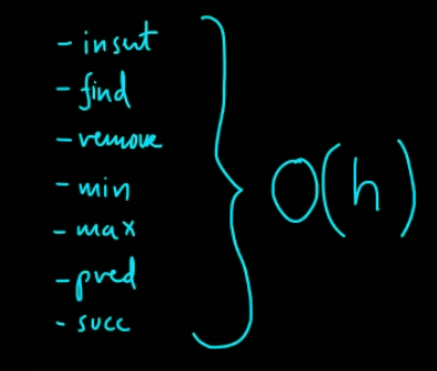

### Implementacja struktury

In [25]:
class BSTNode:
    def __init__(self, key, val):
        self.key = key
        self.val = val
        self.parent = self.left = self.right = None

        
class BST:
    def __init__(self):
        self.root = None
        
    @property
    def min(self):
        return self.min_child(self.root)
        
    @property
    def max(self):
        return self.max_child(self.root)
        
    def insert(self, key, val):
        node = BSTNode(key, val)
        if not self.root:
            self.root = node    
        else:
            curr = self.root
            while True:
                # Enter the right subtree if a key of a value inserted is
                # greater than the key of the current BST node
                if node.key > curr.key:
                    if curr.right: 
                        curr = curr.right
                    else: 
                        curr.right = node
                        node.parent = curr
                        break
                # Enter the left subtree if a key of a value inserted is
                # lower than the key of the current BST node
                elif node.key < curr.key:
                    if curr.left:
                        curr = curr.left
                    else:
                        curr.left = node
                        node.parent = curr
                        break
                # Return False if a node with the same key already exists
                # (We won't change its value)
                else:
                    return False
        # Return True if an object was successfully inserted to BST
        return True
    
    def find(self, key):
        curr = self.root
        while curr:
            # Enter the left subtree
            if key < curr.key:
                curr = curr.left
            # Enter the right subtree
            elif key > curr.key:
                curr = curr.right
            # Return a node which was found
            else:
                return curr
        # If no node of the specified key was found, return None
        return None
    
    @staticmethod
    def min_child(node):
        while node.left:
            node = node.left
        # Return a node of the minimum key
        return node
    
    @staticmethod
    def max_child(node):
        while node.right:
            node = node.right
        # Return a node of the maximum key
        return node
    
    def successor(self, node):
        if node.right:
            return self.min_child(node.right)
        while node.parent:
            if node.parent.left == node:
                return node.parent
            node = node.parent
        return None
        
    def predecessor(self, node):
        if node.left:
            return self.max_child(node.left)
        while node.parent:
            if node.parent.right == node:
                return node.parent
            node = node.parent
        return None
        
    def remove(self, key):
        # Find a node which will be removed
        node = self.find(key)
        # Return None if no node with the specified key was found
        if not node: return None
        # Remove a node and fix a BST
        self._remove_node(node)
        return node
        
    def update(self, key, val):
        node = self.find(key)
        if not node: raise KeyError(f'Invalid key: {key}')
        node.val = val
        
    def _remove_node(self, node):
        # If the current node has no right child
        # (and might not have a left child)
        if not node.right:
            # If the current node is not a root node
            if node.parent:
                if node is node.parent.right:
                    node.parent.right = node.left
                else:
                    node.parent.left = node.left
                if node.left:
                    node.left.parent = node.parent
            # If the current node is a root node
            else:
                self.root = node.left
                if self.root: self.root.parent = None
                
        # If the current node has no left child
        # (and might not have a right child)
        elif not node.left:
            # If the current node is not a root node
            if node.parent:
                if node is node.parent.right:
                    node.parent.right = node.right
                else:
                    node.parent.left = node.right
                if node.right:
                    node.right.parent = node.parent
            # If the current node is a root node
            else:
                self.root = node.right
                if self.root: self.root.parent = None
                
        # If the current node has both children
        else:
            new_node = self.successor(node)
            self._remove_node(new_node)
            
            if node is self.root:
                self.root = new_node
            elif node.parent.right is node:
                node.parent.right = new_node
            else:
                node.parent.left = new_node
                
            new_node.left   = node.left
            new_node.right  = node.right
            new_node.parent = node.parent
            if node.right: node.right.parent = new_node
            if node.left:  node.left.parent  = new_node    
        
        node.parent = node.left = node.right = None

##### Pomocnicze

In [26]:
def binary_tree_string(tree_root, *, fn=lambda node: node.val):
    if not tree_root: return ''

    # Store data from a tree
    data = []
    lvl_nodes = [tree_root]
    just = 1

    while True:
        if not lvl_nodes: break

        curr_row = []
        branches = []
        next_nodes = []

        if not any(lvl_nodes):
            break

        for node in lvl_nodes:
            if not node:
                curr_row.append('')
                branches.extend([' ', ' '])
                next_nodes.extend([None, None])
            else:
                val = str(fn(node))
                just = max(len(val), just)
                curr_row.append(val)

                if node.left:
                    next_nodes.append(node.left)
                    branches.append('/')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

                if node.right:
                    next_nodes.append(node.right)
                    branches.append('\\')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

        data.append((curr_row, branches))
        lvl_nodes = next_nodes

    begin_sep = sep = 3 if just % 2 else 2
    data_iter = iter(data[::-1])
    result = [''] * (len(data) * 2 - 1)
    result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

    # Format the tree string
    for i, (values, branches) in enumerate(data_iter):
        mul = 2 * i + 1
        # Values
        indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
        sep = 2 * sep + just
        result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
        # Branches
        branch_indent = (3 * indent + just) // 4
        branches_row = []
        d_indent = indent - branch_indent
        branches_sep = ' ' * (2 * (d_indent - 1) + just)
        for i in range(0, len(branches), 2):
            branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1]}")
        result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

    return '\n'.join(result)

###### Kilka testów

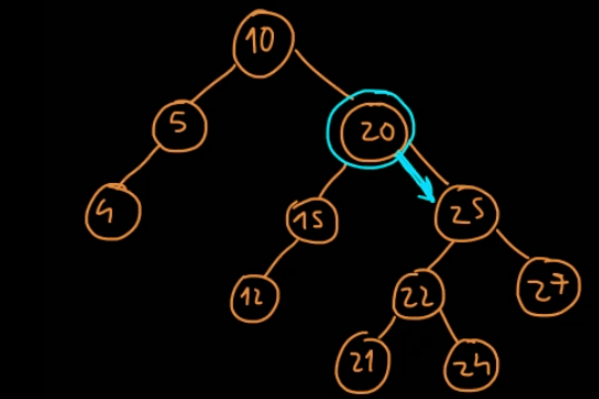

In [27]:
t = BST()
# Przy zmienionej kolejności elementów, możemy uzyskać inne drzewo, ale zawsze będzie ono spełniać
# warunki drzewa BST, czyli wszystkie klucze w lewym poddrzewie danego danego węzła będą mniejsze od
# niego, natomiast wszystkie klucze w prawym poddrzewie od niego większe
for n in (10, 5, 20, 4, 15, 25, 12, 22, 21, 24, 27):  
    t.insert(n, [])

t.update(22, 'kot')
    
print(binary_tree_string(t.root, fn=lambda node: node.key))
print()
print(binary_tree_string(t.root, fn=lambda node: node.val))

                              10
                       /              \
              5                               20
           /                               /      \
      4                               15              25
                                     /               /  \
                                  12              22      27
                                                  /\        
                                                21  24        

                                              []
                                  /                       \
                      []                                              []
                /                                               /           \
          []                                              []                      []
                                                       /                       /     \
                                                    []                     kot          []
  

In [28]:
print(t.min.key)
print(t.max.key)

4
27


In [29]:
print(t.successor(t.find(20)).key)
print(t.successor(t.find(15)).key)
print(t.successor(t.find(12)).key)
print(t.successor(t.find(25)).key)
print(t.successor(t.find(4)).key)
print(t.successor(t.find(10)).key)
print(t.successor(t.find(27)))

21
20
15
27
5
12
None


In [30]:
print(t.predecessor(t.find(20)).key)
print(t.predecessor(t.find(15)).key)
print(t.predecessor(t.find(12)).key)
print(t.predecessor(t.find(25)).key)
print(t.predecessor(t.find(4)))
print(t.predecessor(t.find(10)).key)

15
12
10
24
None
5


In [31]:
print(t.remove(10).key)

10


In [32]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

                              12
                       /              \
              5                               20
           /                               /      \
      4                               15              25
                                                     /  \
                                                  22      27
                                                  /\        
                                                21  24        


In [33]:
print(t.remove(21).key)

21


In [34]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

                              12
                       /              \
              5                               20
           /                               /      \
      4                               15              25
                                                     /  \
                                                  22      27
                                                   \        
                                                    24        


In [35]:
print(t.remove(5).key)

5


In [36]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

                              12
                       /              \
              4                               20
                                           /      \
                                      15              25
                                                     /  \
                                                  22      27
                                                   \        
                                                    24        


In [37]:
print(t.remove(20).key)

20


In [38]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

              12
           /      \
      4               22
                     /  \
                  15      25
                          /\
                        24  27


In [39]:
print(t.remove(22).key)
print(t.remove(24).key)
print(t.remove(25).key)

22
24
25


In [40]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

      12
     /  \
  4       27
          / 
        15    


In [41]:
print(t.remove(12).key)
print(t.remove(27).key)

12
27


In [42]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

  15
  / 
4     


In [43]:
print(t.remove(15).key)
print(t.remove(4).key)
print(binary_tree_string(t.root, fn=lambda node: node.key))

15
4



In [44]:
print(binary_tree_string(t.root, fn=lambda node: node.key))

In [45]:
for i in (5, 9, 4, 2):
    t.insert(i, [])
    
print(binary_tree_string(t.root, fn=lambda node: node.key))

      5
    /   \
  4       9
 /          
2            


In [46]:
t.remove(5)
print(binary_tree_string(t.root, fn=lambda node: node.key))

      9
    /    
  4        
 /          
2            


## Drzewa przedziałowe

### Dodatkowe źródła

###### Minimalna/Maksymalna wartość w przedziale
https://www.youtube.com/watch?v=xztU7lmDLv8

### Pomocnicze źródła

###### Tworzenie zbalansowanego drzewa binarnego z tablicy posortowanych wartości
https://www.techiedelight.com/construct-balanced-bst-given-keys/

### Pomocniczy kod

In [47]:
def binary_tree_string(tree_root, *, fn=lambda node: node.val):
    if not tree_root: return ''

    # Store data from a tree
    data = []
    lvl_nodes = [tree_root]
    just = 1

    while True:
        if not lvl_nodes: break

        curr_row = []
        branches = []
        next_nodes = []

        if not any(lvl_nodes):
            break

        for node in lvl_nodes:
            if not node:
                curr_row.append('')
                branches.extend([' ', ' '])
                next_nodes.extend([None, None])
            else:
                val = str(fn(node))
                just = max(len(val), just)
                curr_row.append(val)

                if node.left:
                    next_nodes.append(node.left)
                    branches.append('/')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

                if node.right:
                    next_nodes.append(node.right)
                    branches.append('\\')
                else:
                    next_nodes.append(None)
                    branches.append(' ')

        data.append((curr_row, branches))
        lvl_nodes = next_nodes

    begin_sep = sep = 3 if just % 2 else 2
    data_iter = iter(data[::-1])
    result = [''] * (len(data) * 2 - 1)
    result[-1] = (' ' * sep).join(val.center(just) for val in next(data_iter)[0])

    # Format the tree string
    for i, (values, branches) in enumerate(data_iter):
        mul = 2 * i + 1
        # Values
        indent = (2 ** (i + 1) - 1) * (just + begin_sep) // 2
        sep = 2 * sep + just
        result[-(mul + 2)] = f"{' ' * indent}{(' ' * sep).join(val.center(just) for val in values)}"
        # Branches
        branch_indent = (3 * indent + just) // 4
        branches_row = []
        d_indent = indent - branch_indent
        branches_sep = ' ' * (2 * (d_indent - 1) + just)
        for i in range(0, len(branches), 2):
            branches_row.append(f"{branches[i]}{branches_sep}{branches[i + 1]}")
        result[-(mul + 1)] = f"{' ' * branch_indent}{(' ' * (sep - 2 * d_indent)).join(branches_row)}"

    return '\n'.join(result)

## Implementacja #1
#### (Drzewo omawiane na wykładzie)
##### (Bez sprawdzania, czy dodawany przedział był już wcześniej dodany)

### Uwagi

Jeżeli kilka razy dodamy ten sam przedział do drzewa, zostanie on dodany wielokrotnie (nie jest sprawdzane to, czy dany przedział został już wcześniej dodany).
<br><br>
Poniższa implementacja sprawdza, czy przedział da się umieścić w drzewie. Jeżeli nie, wzbudzony zostaje wyjątek.

### Złożoność

###### Obliczeniowa
$ O(n \cdot log(n)) $ - budowanie drzewa przedziałowego (sortowanie końców przedziałów odbywa się w tym czasie), <br>
$ O(log(n)) $ - wstawianie pojedynczego przedziału do drzewa, <br>
$ O(log(n) + k) $ - wypisywanie wszystkich przedziałów, w których zawiera się wskazana liczba, gdzie $ n $ - liczba węzłów w drzewie, $ k $ - liczba przedziałów, jakie otrzymamy jako rezultat,
###### Pamięciowa
$ O(n \cdot log(n)) $ - w drzewie maksymalnie znajdzie się $ log(n) $ kopii każdego z przedziałów, a więc łącznie będzie tyle przedziałów
<br><br>
$ n $ - liczba węzłów w drzewie

### Kod

In [48]:
class ITNode:
    def __init__(self, key, span):
        self.key = key
        self.span = span
        self.parent = None
        self.intervals = []
        self.left = self.right = None
        

class IntervalTree:
    def __init__(self, spans, insert_spans=False):
        self.root = self.build_tree(self.get_coordinates(spans))
        if insert_spans:
            for span in spans:
                self.insert(span)
        
    def insert(self, span):
        l, r = span
        is_valid = True
        nodes_list = []
        
        def recur(node):
            # If a node represents a span which is contained in the inserted
            # span, we will add this span to a node's intervals list
            if l <= node.span[0] and node.span[1] <= r:
                nodes_list.append(node)
            # If the span inserted is no valid span
            elif node.key is None:
                nonlocal is_valid
                is_valid = False
                return
            # If the current node's key value splits inserted span, we have
            # to go left and right in a tree
            elif l < node.key < r:
                recur(node.left)
                recur(node.right)
            # If the current node's key is on the right side of the inserted
            # span, we have to go left
            elif r <= node.key:
                recur(node.left)
            # If the current node's key is on the left side, we have to go
            # right
            elif node.key <= l:
                recur(node.right)
            
        recur(self.root)
        
        if not is_valid:
            raise ValueError(f"Span '{span}' cannot be inserted")
        for node in nodes_list:
            node.intervals.append(span)
        
    def query(self, val):
        intervals = []
        
        def recur(node):
            if node.span[0] <= val <= node.span[1]:
                if node.key:
                    if val <= node.key:  # change to < if want sharp inequality
                        recur(node.left)
                    elif val >= node.key:  # change to > if want sharp inequality
                        recur(node.right)
                intervals.extend(node.intervals)
                    
        recur(self.root)
        return intervals
        
    @staticmethod
    def build_tree(values):
        inf = float('inf')
        l = r = inf
        
        def recur(i, j, l=-inf, r=inf, parent=None):
            # Create a leaf node
            if i > j: 
                node = ITNode(None, (l, parent.key) if l != parent.key else (parent.key, r))
                node.parent = parent
                return node
            
            mid = (i + j) // 2
            root = ITNode(values[mid], (l, r))
            root.parent = parent
            root.left  = recur(i, mid - 1, l, values[mid], root)
            root.right = recur(mid + 1, j, values[mid], r, root)
            
            return root
        
        return recur(0, len(values) - 1)
        
    @staticmethod
    def get_coordinates(spans):
        # Create an array of sorted begin-end spans coordinates
        A = [c for span in spans for c in span]
        A.sort()
        # Filter out repeated values
        B = [A[0]]
        for i in range(1, len(A)):
            if A[i] != A[i - 1]:
                B.append(A[i])
        return B

###### Kilka testów

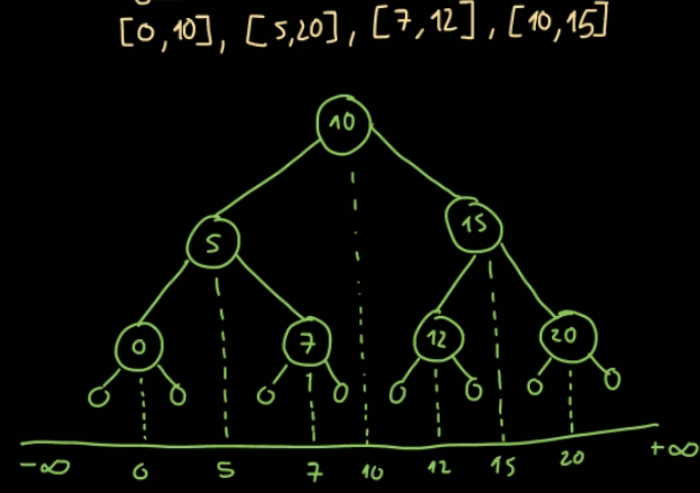

In [49]:
S = [[0, 10], [5, 20], [7, 12], [10, 15]]

it = IntervalTree(S, True)

In [50]:
print(binary_tree_string(it.root, fn=lambda node: node.key))

                      10 
                /            \
          5                       15 
       /      \                /      \
    0           7           12          20 
   /  \        /  \        /  \        /  \
None  None  None  None  None  None  None  None


In [51]:
print(binary_tree_string(it.root, fn=lambda node: node.span))

                                                 (-inf, inf)
                                       /                             \
                      (-inf, 10)                                              (10, inf) 
                  /               \                                       /               \
        (-inf, 5)                    (5, 10)                     (10, 15)                   (15, inf) 
        /       \                   /       \                   /       \                   /       \
 (-inf, 0)       (0, 5)        (5, 7)       (7, 10)       (10, 12)      (12, 15)      (15, 20)     (20, inf) 


In [52]:
def dfs(node):
    print(f'Node key: {str(node.key).ljust(4)} \tparent: {str(node.parent.key if node.parent else None).ljust(4)} \tintervals: {node.intervals}')
    if node.left:
        dfs(node.left)
    if node.right:
        dfs(node.right)
        
dfs(it.root)

Node key: 10   	parent: None 	intervals: []
Node key: 5    	parent: 10   	intervals: []
Node key: 0    	parent: 5    	intervals: []
Node key: None 	parent: 0    	intervals: []
Node key: None 	parent: 0    	intervals: [[0, 10]]
Node key: 7    	parent: 5    	intervals: [[0, 10], [5, 20]]
Node key: None 	parent: 7    	intervals: []
Node key: None 	parent: 7    	intervals: [[7, 12]]
Node key: 15   	parent: 10   	intervals: []
Node key: 12   	parent: 15   	intervals: [[5, 20], [10, 15]]
Node key: None 	parent: 12   	intervals: [[7, 12]]
Node key: None 	parent: 12   	intervals: []
Node key: 20   	parent: 15   	intervals: []
Node key: None 	parent: 20   	intervals: [[5, 20]]
Node key: None 	parent: 20   	intervals: []


In [53]:
it.query(10)

[[7, 12], [0, 10], [5, 20]]

In [54]:
it.insert([0, 10])

In [55]:
dfs(it.root)

Node key: 10   	parent: None 	intervals: []
Node key: 5    	parent: 10   	intervals: []
Node key: 0    	parent: 5    	intervals: []
Node key: None 	parent: 0    	intervals: []
Node key: None 	parent: 0    	intervals: [[0, 10], [0, 10]]
Node key: 7    	parent: 5    	intervals: [[0, 10], [5, 20], [0, 10]]
Node key: None 	parent: 7    	intervals: []
Node key: None 	parent: 7    	intervals: [[7, 12]]
Node key: 15   	parent: 10   	intervals: []
Node key: 12   	parent: 15   	intervals: [[5, 20], [10, 15]]
Node key: None 	parent: 12   	intervals: [[7, 12]]
Node key: None 	parent: 12   	intervals: []
Node key: 20   	parent: 15   	intervals: []
Node key: None 	parent: 20   	intervals: [[5, 20]]
Node key: None 	parent: 20   	intervals: []


In [56]:
# it.insert([7, 11])  # This will raise an exception

In [57]:
dfs(it.root)

Node key: 10   	parent: None 	intervals: []
Node key: 5    	parent: 10   	intervals: []
Node key: 0    	parent: 5    	intervals: []
Node key: None 	parent: 0    	intervals: []
Node key: None 	parent: 0    	intervals: [[0, 10], [0, 10]]
Node key: 7    	parent: 5    	intervals: [[0, 10], [5, 20], [0, 10]]
Node key: None 	parent: 7    	intervals: []
Node key: None 	parent: 7    	intervals: [[7, 12]]
Node key: 15   	parent: 10   	intervals: []
Node key: 12   	parent: 15   	intervals: [[5, 20], [10, 15]]
Node key: None 	parent: 12   	intervals: [[7, 12]]
Node key: None 	parent: 12   	intervals: []
Node key: 20   	parent: 15   	intervals: []
Node key: None 	parent: 20   	intervals: [[5, 20]]
Node key: None 	parent: 20   	intervals: []


## Implementacja #2
#### (Drzewo omawiane na wykładzie)
##### (Ze sprawdzaniem, czy dodawany przedział był już wcześniej dodany)

### Uwagi

Klasa $ SpansTree $ pozwala na dodawanie i usuwanie oraz sprawdzanie, czy dany przedział został już wcześniej dodany, w czasie logarytmicznym. Wykorzystujemy do tego drzewo drzew binarnych, gdzie pierwsze drzewo opdowiada pierwszej współrzędnej przedziału, a drugie drzewo - drugiej współrzędnej. Można by wykorzystać zwykłe drzewo binarne, ale takie podejście powoduje, że mamy więcej informacji o przedziałach, w szczególności możemy otrzymać liczbę przedziałów, które zaczynają się daną współrzędną.

### Złożoność

Taka sama jak wcześniej

### Kod

In [58]:
class BSTNode:
    def __init__(self, key):
        self.key = key
        self.parent = self.left = self.right = None

        
class BST:
    def __init__(self):
        self.root = None
        
    def insert(self, key):
        node = BSTNode(key)
        if not self.root:
            self.root = node    
        else:
            curr = self.root
            while True:
                # Enter the right subtree if a key of a value inserted is
                # greater than the key of the current BST node
                if node.key > curr.key:
                    if curr.right: 
                        curr = curr.right
                    else: 
                        curr.right = node
                        node.parent = curr
                        break
                # Enter the left subtree if a key of a value inserted is
                # lower than the key of the current BST node
                elif node.key < curr.key:
                    if curr.left:
                        curr = curr.left
                    else:
                        curr.left = node
                        node.parent = curr
                        break
                # Return False and a node found if a node with the same
                # key already exists
                else:
                    return False, curr
        # Return True and a node which was inserted
        return True, node
    
    def find(self, key):
        curr = self.root
        while curr:
            # Enter the left subtree
            if key < curr.key:
                curr = curr.left
            # Enter the right subtree
            elif key > curr.key:
                curr = curr.right
            # Return a node which was found
            else:
                return curr
        # If no node of the specified key was found, return None
        return None
        
    def remove_node(self, node):
        # If the current node has no right child
        # (and might not have a left child)
        if not node.right:
            # If the current node is not a root node
            if node.parent:
                if node is node.parent.right:
                    node.parent.right = node.left
                else:
                    node.parent.left = node.left
                if node.left:
                    node.left.parent = node.parent
            # If the current node is a root node
            else:
                self.root = node.left
                if self.root: self.root.parent = None
                
        # If the current node has no left child
        # (and might not have a right child)
        elif not node.left:
            # If the current node is not a root node
            if node.parent:
                if node is node.parent.right:
                    node.parent.right = node.right
                else:
                    node.parent.left = node.right
                if node.right:
                    node.right.parent = node.parent
            # If the current node is a root node
            else:
                self.root = node.right
                if self.root: self.root.parent = None
                
        # If the current node has both children
        else:
            new_node = self.successor(node)
            self.remove_node(new_node)
            
            if node is self.root:
                self.root = new_node
            elif node.parent.right is node:
                node.parent.right = new_node
            else:
                node.parent.left = new_node
                
            new_node.left   = node.left
            new_node.right  = node.right
            new_node.parent = node.parent
            if node.right: node.right.parent = new_node
            if node.left:  node.left.parent  = new_node    
        
        node.parent = node.left = node.right = None
        
        
class SpansTree:
    def __init__(self):
        self.bst = BST()
        
    def insert(self, span: '[a, b]') -> bool:
        a, b = span
        is_new, node = self.bst.insert(a)
        if is_new: node.bst = BST()
        is_new, _ = node.bst.insert(b)
        # Return information if a span was inserted or not
        return is_new
    
    def find(self, span) -> BSTNode:
        a, b = span
        a_node = self.bst.find(a)
        if not a_node: return None
        b_node = a_node.bst.find(b)
        return b_node
    
    def includes(self, span: '[a, b]') -> bool:
        return bool(self.find(span))
    
    def remove(self, span: '[a, b]') -> bool:
        a, b = span
        a_node = self.bst.find(a)
        # Return False if there is no span which starts with 'a' coordinate
        if not a_node: return False
        b_node = a_node.bst.find(b)
        # Reurn False if there is no span which ends with 'b' coordinate
        if not b_node: return False
        # Otherwise, remove 'b' coordinate
        a_node.bst.remove_node(b_node)
        # If there are no more spans which start with 'a', remove the entire
        # BST referring to 'a' coordinate
        if not a_node.bst.root: self.bst.remove_node(a_node)
        return True
    
    def get_all_spans(self) -> list:
        if not self.bst.root: return []
        spans = []
        
        def dfs_a(node):
            if node.bst.root: dfs_b(node.bst.root, node.key)
            if node.left: dfs_a(node.left)
            if node.right: dfs_a(node.right)
        
        def dfs_b(node, a):
            spans.append([a, node.key])
            if node.left: dfs_b(node.left)
            if node.right: dfs_b(node.right)
                
        dfs_a(self.bst.root)
        return spans
        
        
class ITNode:
    def __init__(self, key, span):
        self.key = key
        self.span = span
        self.parent = None
        self.st = SpansTree()  # We will store intervals in here 
        self.left = self.right = None
        

class IntervalTree:
    def __init__(self, spans, insert_spans=False):
        self.root = self.build_tree(self.get_coordinates(spans))
        if insert_spans:
            for span in spans:
                self.insert(span)
        
    def insert(self, span):
        # Get a list of nodes in which a span will be stored
        nodes_list = self._get_nodes_list(span)
        # Return False if there are no nodes, so a span inserted
        # is not valid
        if not nodes_list: return False
        # Add a span to nodes which were found
        for node in nodes_list:
            # Return False if a span was inserted before
            if not node.st.insert(span):
                return False
        return True
    
    def remove(self, span):
        # Get a list of nodes in which a span is stored
        nodes_list = self._get_nodes_list(span)
        # Return False if there are no nodes, so a span inserted
        # is not valid
        if not nodes_list: return False
        # Remove a span from each node
        for node in nodes_list:
            # Return False if a span isn't stored in a tree
            if not node.st.remove(span):
                return False
        return True
        
    def query(self, val):
        intervals = []
        
        def recur(node):
            if node.span[0] <= val <= node.span[1]:
                if node.key:
                    if val <= node.key:  # change to < if want sharp inequality
                        recur(node.left)
                    elif val >= node.key:  # change to > if want sharp inequality
                        recur(node.right)
                intervals.extend(node.st.get_all_spans())
                    
        recur(self.root)
        return intervals
        
    @staticmethod
    def build_tree(values):
        inf = float('inf')
        l = r = inf
        
        def recur(i, j, l=-inf, r=inf, parent=None):
            # Create a leaf node
            if i > j: 
                node = ITNode(None, (l, parent.key) if l != parent.key else (parent.key, r))
                node.parent = parent
                return node
            
            mid = (i + j) // 2
            root = ITNode(values[mid], (l, r))
            root.parent = parent
            root.left  = recur(i, mid - 1, l, values[mid], root)
            root.right = recur(mid + 1, j, values[mid], r, root)
            
            return root
        
        return recur(0, len(values) - 1)
        
    @staticmethod
    def get_coordinates(spans):
        # Create an array of sorted begin-end spans coordinates
        A = [c for span in spans for c in span]
        A.sort()
        # Filter out repeated values
        B = [A[0]]
        for i in range(1, len(A)):
            if A[i] != A[i - 1]:
                B.append(A[i])
        return B
    
    def _get_nodes_list(self, span):
        l, r = span
        nodes_list = []
        
        def recur(node):
            # If a node represents a span which is contained in the inserted
            # span, we will add this span to a node's intervals list
            if l <= node.span[0] and node.span[1] <= r:
                nodes_list.append(node)
            # If the span inserted is no valid span
            elif node.key is None:
                nodes_list.clear()
                return
            # If the current node's key value splits inserted span, we have
            # to go left and right in a tree
            elif l < node.key < r:
                recur(node.left)
                recur(node.right)
            # If the current node's key is on the right side of the inserted
            # span, we have to go left
            elif r <= node.key:
                recur(node.left)
            # If the current node's key is on the left side, we have to go
            # right
            elif node.key <= l:
                recur(node.right)
                
        recur(self.root)
        return nodes_list

###### Kilka testów

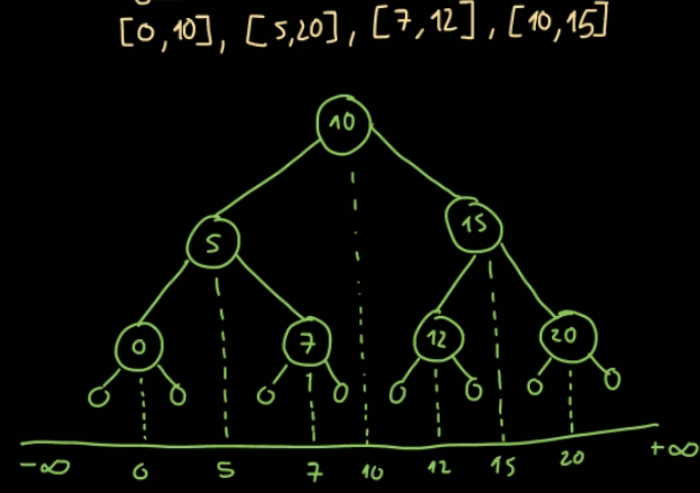

In [59]:
S = [[0, 10], [5, 20], [7, 12], [10, 15]]

it = IntervalTree(S, True)

def dfs(node):
    print(f'Node key: {str(node.key).ljust(4)} \tparent: {str(node.parent.key if node.parent else None).ljust(4)} \tintervals: {node.st.get_all_spans()}')
    if node.left:
        dfs(node.left)
    if node.right:
        dfs(node.right)

In [60]:
dfs(it.root)

Node key: 10   	parent: None 	intervals: []
Node key: 5    	parent: 10   	intervals: []
Node key: 0    	parent: 5    	intervals: []
Node key: None 	parent: 0    	intervals: []
Node key: None 	parent: 0    	intervals: [[0, 10]]
Node key: 7    	parent: 5    	intervals: [[0, 10], [5, 20]]
Node key: None 	parent: 7    	intervals: []
Node key: None 	parent: 7    	intervals: [[7, 12]]
Node key: 15   	parent: 10   	intervals: []
Node key: 12   	parent: 15   	intervals: [[5, 20], [10, 15]]
Node key: None 	parent: 12   	intervals: [[7, 12]]
Node key: None 	parent: 12   	intervals: []
Node key: 20   	parent: 15   	intervals: []
Node key: None 	parent: 20   	intervals: [[5, 20]]
Node key: None 	parent: 20   	intervals: []


In [61]:
print('inserted?', it.insert([0, 10]))
dfs(it.root)

inserted? False
Node key: 10   	parent: None 	intervals: []
Node key: 5    	parent: 10   	intervals: []
Node key: 0    	parent: 5    	intervals: []
Node key: None 	parent: 0    	intervals: []
Node key: None 	parent: 0    	intervals: [[0, 10]]
Node key: 7    	parent: 5    	intervals: [[0, 10], [5, 20]]
Node key: None 	parent: 7    	intervals: []
Node key: None 	parent: 7    	intervals: [[7, 12]]
Node key: 15   	parent: 10   	intervals: []
Node key: 12   	parent: 15   	intervals: [[5, 20], [10, 15]]
Node key: None 	parent: 12   	intervals: [[7, 12]]
Node key: None 	parent: 12   	intervals: []
Node key: 20   	parent: 15   	intervals: []
Node key: None 	parent: 20   	intervals: [[5, 20]]
Node key: None 	parent: 20   	intervals: []


##### Debug:

In [62]:
st = SpansTree()
for span in [[0, 10], [5, 20], [7, 12], [10, 15]]: print('Span:', span, 'Inserted?', st.insert(span))
for span in [[0, 10], [5, 20], [7, 12], [10, 15]]: print('Span:', span, 'Inserted?', st.insert(span))

Span: [0, 10] Inserted? True
Span: [5, 20] Inserted? True
Span: [7, 12] Inserted? True
Span: [10, 15] Inserted? True
Span: [0, 10] Inserted? False
Span: [5, 20] Inserted? False
Span: [7, 12] Inserted? False
Span: [10, 15] Inserted? False


In [63]:
print('Inserted?', st.insert([0, 11]))
print('Inserted?', st.insert([0, 12]))
print('Inserted?', st.insert([5, 6]))

Inserted? True
Inserted? True
Inserted? True


In [64]:
print('Includes?:', st.includes([0, 11]))
print('Includes?:', st.includes([10, 15]))
print('Includes?:', st.includes([0, 5]))

Includes?: True
Includes?: True
Includes?: False


In [65]:
print('Removed?:', st.remove([0, 11]))
print('Removed?:', st.remove([0, 11]))

Removed?: True
Removed?: False


# Problem sumy podprzedziałów
### (Omawiany pod koniec trzeciego nagrania)

### Złożoność

###### Obliczeniowa
$ O(n) $ - budowanie drzewa przedziałowego (tym razem nie sortujemy nic), <br>
$ O(log(n)) $ - znajdowanie sumy podprzedziału, <br>
$ O(log(n)) $ - modyfikacja pojedynczej wartości z przedziału (konieczne jest naprawienie sum w odpowiednich węzłach w czasie $ O(log(n)) $),
###### Pamięciowa
$ O(n) $ - w drzewie znajdzie się maksymalnie $ 2 \cdot n $ elementów - na każdym poziomie wyżej $ 2 $ razy mniej niż na poprzednim, a na ostatnim będzie dokładnie $ n $ elementów, gdzie $ n $ - liczba wartości w całym przedziale (otrzymujemy więc złożoność $ O(2 \cdot n) = O(n) $)

### Implementacja

In [66]:
class SegmentTree:
    def __init__(self, values):
        self.n = len(values)
        self.tree = self._create_tree(values)
        
    def __repr__(self):
        return f'SegmentTree({self.tree[self.n:]})'
        
    def update(self, idx, value):
        i = self.n + idx
        diff = value - self.tree[i]
        # Update all parents sums
        while i: # Root has 1 index so we can loop till an index is non-zero
            self.tree[i] += diff
            i //= 2  # Move to the parent's node
        
    def get_sum(self, a: 'first number index', b: 'last number index'):
        total = 0
        
        def recur(idx=1, i=0, j=self.n-1):
            if a <= i and j <= b:
                nonlocal total
                total += self.tree[idx]
            else:
                mid = (i + j) // 2
                if mid < a:
                    recur(2 * idx + 1, mid + 1, j)
                elif mid >= b:
                    recur(2 * idx, i, mid)
                else:
                    recur(2 * idx + 1, mid + 1, j)
                    recur(2 * idx, i, mid)
                    
        recur()
        return total
        
    def _create_tree(self, values):
        n = len(values)
        arr = [None] * (2 * n)
        
        for i in range(n):
            arr[n + i] = values[i]
            
        for i in range(n - 1, 0, -1):
            arr[i] = arr[2 * i] + arr[2 * i + 1]
            
        return arr

###### Kilka testów

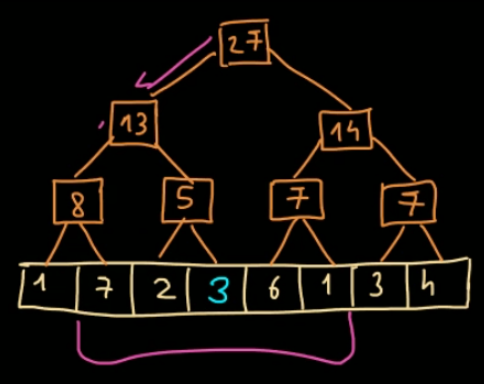

In [67]:
A = [1, 7, 2, 3, 6, 1, 3, 4]

st = SegmentTree(A)
print(st.tree)

[None, 27, 13, 14, 8, 5, 7, 7, 1, 7, 2, 3, 6, 1, 3, 4]


In [68]:
print(st.get_sum(2, 5))

12


In [69]:
print(st.get_sum(5, 5))

1


In [70]:
# Możemy również dać sporo za duże i za małe indeksy. Wówczas zostanie zwrócona suma
# całego przedziału lub wszystkich wartości od danej do końca (np. dla (-100, 4) otrzymamy sumę
# liczb z indeksów 0, 1, 2, 3, 4)
print(st.get_sum(-100, 4))

19


In [71]:
print(st.get_sum(1, 5))

19


In [72]:
st

SegmentTree([1, 7, 2, 3, 6, 1, 3, 4])

In [73]:
st.update(2, -6)
print(st.tree)
st.update(7, 20)
print(st.tree)
st.update(0, -11)
print(st)
print(st.tree)

[None, 19, 5, 14, 8, -3, 7, 7, 1, 7, -6, 3, 6, 1, 3, 4]
[None, 35, 5, 30, 8, -3, 7, 23, 1, 7, -6, 3, 6, 1, 3, 20]
SegmentTree([-11, 7, -6, 3, 6, 1, 3, 20])
[None, 23, -7, 30, -4, -3, 7, 23, -11, 7, -6, 3, 6, 1, 3, 20]


In [74]:
print(st.get_sum(0, 3))

-7
